# Nooksack Groundwater-Surface Water Model Coupling

### Install packages and libraries

In [ ]:
# Packages not on HydroShare R kernal  - only need to run 
# install.packages('hydroGOF')
# install.packages('writexl')
# install.packages('doParallel')

In [3]:
# silence the library loading messages
library(data.table)
library(writexl)

suppressMessages(library(dplyr))
suppressMessages(library(reshape2))
suppressMessages(library(hydroGOF))
suppressMessages(library(doParallel))

### File management and decompression

#### Only need to run the cell below the first time the data is downloaded from HydroShare to this HPC workspace. See working directory above.

unzip('modelruns_1952WRIA1_081418.zip')

### Open a new terminal, change directory, and unzip all model files
cd 
'/home/jovyan/work/notebooks/data/fb5e45f7bfea4765a445a190b809cbdb/fb5e45f7bfea4765a445a190b809cbdb/data/contents'

Run
> gunzip modelruns_1952WRIA1_081418/*/*

In [4]:
# assign Project 2018 as the current directory
Project2018 <- getwd()
WMoff2018_Models <- file.path(Project2018, 'modelruns_1952WRIA1_081418/modelruns_1952WRIA1_110912_WMoff')
WMon2012_Models <- file.path(Project2018, 'modelruns_1952WRIA1_081418/modelruns_1952WRIA1_110912_WMon')

In [5]:
# set working directory
setwd(WMon2012_Models)

ERROR: Error in setwd(WMon2012_Models): cannot change working directory


### Read in files and data

In [7]:
list.files()

[1] "~$LNDrainageOutput_WMFinal_102312.xlsm"    
  [2] "~$LNDrainageOutput_WMFinal_102312.xlsm.gz" 
  [3] "AD_FASN_Summary.txt"                       
  [4] "AET.txt"                                   
  [5] "AET.txt.gz"                                
  [6] "Artificial_Drainage_cfs.txt"               
  [7] "Artificial_Drainage_cms.txt"               
  [8] "Artificial_Drainage_cms.txt.gz"            
  [9] "Artificial_Drainage.txt"                   
 [10] "Artificial_Drainage.txt.gz"                
 [11] "b85.txt"                                   
 [12] "b85.txt.gz"                                
 [13] "Baseflow_cms.txt"                          
 [14] "Baseflow_cms.txt.gz"                       
 [15] "basinpars.txt"                             
 [16] "basinpars.txt.gz"                          
 [17] "bcpar.dat"                                 
 [18] "bcpar.dat.gz"                              
 [19] "bndryflow.dat"                             
 [20] "bndryflow.dat.gz"                          
 [21] "bndryflow2007.dat"                         
 [22] "bndryflow2007.dat.gz"                      
 [23] "bndryflow2012.dat"                         
 [24] "bndryflow2012.dat.gz"                      
 [25] "Canopy_Storage_LowerNooksack_mm.txt"       
 [26] "Canopy_Storage_LowerNooksack_mm.txt.gz"    
 [27] "Canopy_storage_mm.txt"                     
 [28] "Canopy_storage_mm.txt.gz"                  
 [29] "clipar.dat"                                
 [30] "clipar.dat.gz"                             
 [31] "dailyRecharge_depot.txt"                   
 [32] "DateTime_water_year.txt"                   
 [33] "DateTime_yyyymmdd_hhmmss.txt"              
 [34] "DateTime_yyyymmdd_hhmmss.txt.gz"           
 [35] "dc.dat"                                    
 [36] "dc.dat.gz"                                 
 [37] "Depth_to_Water_mm.txt"                     
 [38] "Depth_to_Water_mm.txt.gz"                  
 [39] "DETAIL_v7.TXT"                             
 [40] "DETAIL_v7.TXT.gz"                          
 [41] "Ditch_drainage_cms.txt"                    
 [42] "Ditch_drainage_cms.txt.gz"                 
 [43] "drainage.txt"                              
 [44] "drainage.txt.gz"                           
 [45] "DrainageID.txt"                            
 [46] "DrainageID.txt.gz"                         
 [47] "DrainageInfo.txt"                          
 [48] "DrainageInfo.txt.gz"                       
 [49] "Evaporation_in.txt"                        
 [50] "Evaporation_mm.txt"                        
 [51] "Evaporation_mm.txt.gz"                     
 [52] "FlowAtStreamNodes_cfs.txt"                 
 [53] "FlowAtStreamNodes_cms.txt"                 
 [54] "FlowAtStreamNodes_cms.txt.gz"              
 [55] "fort.137"                                  
 [56] "fort.137.gz"                               
 [57] "fort.138"                                  
 [58] "fort.138.gz"                               
 [59] "fort.139"                                  
 [60] "fort.139.gz"                               
 [61] "fort.140"                                  
 [62] "fort.140.gz"                               
 [63] "fort.141"                                  
 [64] "fort.141.gz"                               
 [65] "fort.41"                                   
 [66] "fort.41.gz"                                
 [67] "fort.882"                                  
 [68] "fort.882.gz"                               
 [69] "fort.883"                                  
 [70] "fort.883.gz"                               
 [71] "InfEx.txt"                                 
 [72] "InfEx.txt.gz"                              
 [73] "interpweight.dat"                          
 [74] "interpweight.dat.gz"                       
 [75] "latlongfromxy.txt"                         
 [76] "latlongfromxy.txt.gz"                      
 [77] "MeasuredFlowInfo.txt"                      
 [78] "MeasuredFlowInfo.txt.gz"                   
 [79] "modelruns_summary

# 1.0 Recharge Calculations

In [8]:
# read topsbd (mod: changed to fread for spead and added data.table=T)
topsbd <- fread('topsbd_v8.txt', skip = 1, header = T, data.table=T)
colnames(topsbd)
head(topsbd,10)

Read 1472336 rows and 29 (of 29) columns from 0.453 GB file in 00:00:18


[1] "Basin"         "TimeStep"      "IrrDrainCat"   "Afrac"        
 [5] "SWInput_mm"    "Qlat_mm"       "Qtot_mm"       "Qb_mm"        
 [9] "Recharge_mm"   "SatEx_mm"      "InfEx_mm"      "SurfRo_mm"    
[13] "SatAfrac"      "InfAfrac"      "IntStore_mm"   "WTDepth_mm"   
[17] "SoilStore_mm"  "Pet_mm"        "Aet_mm"        "Irrig_mm"     
[21] "GWTake_mm"     "IrrDem_mm"     "Prec_mm"       "SWE_mm"       
[25] "Sublim_mm"     "Tave_C"        "Tdew_C"        "Trange_C"     
[29] "ErrClosure_mm"

Basin,TimeStep,IrrDrainCat,Afrac,SWInput_mm,Qlat_mm,Qtot_mm,Qb_mm,Recharge_mm,SatEx_mm,⋯,Irrig_mm,GWTake_mm,IrrDem_mm,Prec_mm,SWE_mm,Sublim_mm,Tave_C,Tdew_C,Trange_C,ErrClosure_mm
6,1,1,1,10.70757,17.42539,16.90304,16.37722,0,1.03387,⋯,0,0,0,10.70757,0,0,8.52888,6.03442,5.77143,0.00000
7,1,1,1,11.68016,13.07120,12.37844,12.05527,0,0.99646,⋯,0,0,0,11.68016,0,0,8.60184,5.79848,6.60358,0.00000
8,1,1,1,11.44907,12.76301,12.29512,11.83745,0,0.91263,⋯,0,0,0,11.44907,0,0,7.71119,4.69198,6.98780,0.00000
9,1,1,1,12.73852,22.14235,21.21954,20.41596,0,1.72639,⋯,0,0,0,12.73852,0,0,7.30535,3.87626,7.90180,0.00000
12,1,1,1,13.93606,31.16256,30.06448,28.99576,0,2.16680,⋯,0,0,0,13.93606,0,0,7.42370,3.82616,8.30975,0.00000
16,1,1,1,12.60017,20.81138,20.51885,19.56141,0,1.24997,⋯,0,0,0,12.60017,0,0,6.86799,4.32785,6.16382,0.00000
19,1,1,1,14.96286,25.79079,24.74843,23.32939,0,2.46141,⋯,0,0,0,14.96286,0,0,6.03645,3.36028,6.60519,0.00000
20,1,1,1,18.52457,21.91575,17.61784,16.32066,0,5.59509,⋯,0,0,0,18.52457,0,0,5.47178,2.57470,7.33425,0.00000
21,1,1,1,14.16185,23.92696,22.79965,21.67105,0,2.25591,⋯,0,0,0,14.16185,0,0,6.64852,3.71863,7.05474,0.00000
23,1,1,1,14.55717,20.79876,20.10209,18.74177,0,2.05699,⋯,0,0,0,14.55717,0,0,5.93241,3.31823,6.41573,0.00000


In [9]:
# generate TimeStep by subbasin matrices (mod: added 'mean' as the aggregation function)
Zbar <- topsbd %>% select(TimeStep, Basin, Afrac, WTDepth_mm) %>% mutate(afrac_test = Afrac*WTDepth_mm) %>% dcast(TimeStep~Basin, value.var='afrac_test', fun.aggregate=sum)
PET <- topsbd %>% select(TimeStep, Basin, Afrac, Pet_mm) %>% mutate(afrac_test = Afrac*Pet_mm) %>% dcast(TimeStep~Basin, value.var='afrac_test', fun.aggregate=sum)
AET <- topsbd %>% select(TimeStep, Basin, Afrac, Aet_mm) %>% mutate(afrac_test = Afrac*Aet_mm) %>% dcast(TimeStep~Basin, value.var='afrac_test', fun.aggregate=sum)
Rain <- topsbd %>% select(TimeStep, Basin, Afrac, Prec_mm) %>% mutate(afrac_test = Afrac*Prec_mm) %>% dcast(TimeStep~Basin, value.var='afrac_test', fun.aggregate=sum)
SatEx <- topsbd %>% select(TimeStep, Basin, Afrac, SatEx_mm) %>% mutate(afrac_test = Afrac*SatEx_mm) %>% dcast(TimeStep~Basin, value.var='afrac_test', fun.aggregate=sum)
InfEx <- topsbd %>% select(TimeStep, Basin, Afrac, InfEx_mm) %>% mutate(afrac_test = Afrac*InfEx_mm) %>% dcast(TimeStep~Basin, value.var='afrac_test', fun.aggregate=sum)
SurfRO <- topsbd %>% select(TimeStep, Basin, Afrac, SurfRo_mm) %>% mutate(afrac_test = Afrac*SurfRo_mm) %>% dcast(TimeStep~Basin, value.var='afrac_test', fun.aggregate=sum)
SoilStore <- topsbd %>% select(TimeStep, Basin, Afrac, SoilStore_mm) %>% mutate(afrac_test = Afrac*SoilStore_mm) %>% dcast(TimeStep~Basin, value.var='afrac_test', fun.aggregate=sum)

In [10]:
# load Recharge inputs
#Basins <- read.table("basin.txt", header=T, row.names=1) # mod: added row.names=1
Precipitation_mm <- Rain
Depth_to_Water_mm <- Zbar
Evaporation_mm = fread("Evaporation_mm.txt", header=T)
Soil_storage_mm <- SoilStore

# Make if statement here
Surface_runoff_cms = fread("TotalRunoff_noWithdrawal_cms.txt", header=T)

In [11]:
#dim(Basins)
dim(Precipitation_mm)
dim(Evaporation_mm)
dim(Depth_to_Water_mm) # matrices sourced from Basin are selected subset of basins
dim(Surface_runoff_cms)

[1] 21652    37

[1] 21652   173

[1] 21652    37

[1] 21652   173

## Print individual text files of water budget variables
See variable names for text file naming

In [12]:
# print these outputs from topsbd_v8.txt
for (mat in c('InfEx', 'PET', 'AET', 'SatEx', 'Rain', 'Zbar', 'SoilStore', 'Surface_runoff_cms')){
    write.table(mat %>% get() %>% data.frame(), file = paste0(mat, '.txt'), col.names = T, row.names = F, append = F)
    print(paste(mat, 'printed to', paste0(mat, '.txt')))
}

[1] "InfEx printed to InfEx.txt"
[1] "PET printed to PET.txt"
[1] "AET printed to AET.txt"
[1] "SatEx printed to SatEx.txt"
[1] "Rain printed to Rain.txt"
[1] "Zbar printed to Zbar.txt"
[1] "SoilStore printed to SoilStore.txt"
[1] "Surface_runoff_cms printed to Surface_runoff_cms.txt"


### Functions for aggregation

In [13]:
# function to calculate the water year
wtr_yr <- function(dates, start_month=10) {
    # Convert dates into POSIXlt
    dates.posix = as.POSIXlt(as.character(dates), format = '%Y%m%d')

    # Calculate offset based on the month of the year
    offset = ifelse(dates.posix$mon >= start_month, 1, 0)

    # adjust the current year to the appropriate Water year
    adj.year = dates.posix$year + 1900 + offset # year + adjustment for date origin + offset
    return(adj.year)
}


# function to read in the time series files 
findmeta <- function(file){
    # index last row of metadata, depends on use of "Ver#" start to header line
    meta_end <- grep('^Ver', readLines(file))

    # metadata
    meta <- readLines(file)[1:meta_end] %>% 
      gsub("^\\t+|\\t+$|^\\s+|\\s+$|^ ","",.) %>% # removing leading and trailing spaces and tabs
      gsub("\\t+"," ",.) # separate tab-separated metadata

    print(paste("metadata headers for", file))
    return(meta)
}


# function to read in .dat format output files
read_dat <- function(file, meta){
    # column names based on tab separation
    col.Names <- meta %>% gsub("\\t+$","",.) %>%
        strsplit(' |\t') %>% 
        tail(1) %>%
        unlist() %>%
        .[-c(1,2)] %>%
        .[.!=""]

    # arrange the data
    dat <- read.csv(file, sep='', skip = length(meta), header = F)
    nonNA <- colnames(dat)[which(colSums(is.na(dat)) != nrow(dat))]
    dat <- dat[colnames(dat) %in% nonNA] %>% data.table()
    setnames(dat, colnames(dat), col.Names)

    return(dat)
}

### Algorithm to Calculate Recharge

In [14]:
# functionalize the timesteploop
timesteploop <- function(TimeStep, basin_subset, totalRecharge_depot, Precipitation_mm, Evaporation_mm, 
                         Surface_runoff_cms, Soil_storage_mm, totalRecharge=0){
        
    # for every TimeStep
    for(ts in TimeStep){
        
        # for each catchment
        for (CatchID in basin_subset[['Basins']]){
            Drainage = as.character(basin_subset[Basins==CatchID,'Drainages'])
            
            ### Look up P, E, and SR values for this daily timestep and convert to inches
            P <- Precipitation_mm[ts, CatchID]*0.0393701	#Precipitation (in)
            E <- as.numeric(Evaporation_mm[ts, Drainage, with=F])*0.0393701	#Evaporation (in)
            SR <- as.numeric(Surface_runoff_cms[ts, Drainage, with=F])*61024*60*60*24/Basinpars[CatchID, "BasinArea_in2"] #Surface runoff/Basin area (in)

            if(ts==1){
                CDW <- as.numeric(0) ### Calculate change in depth to water (in)
                CSS <- as.numeric(0) ### Calculate change in soil storage term (in)
            } else {
                # take the difference between the current water depth and the previous water depth at this Drainage
                CDW <- (Depth_to_Water_mm[ts, CatchID] - Depth_to_Water_mm[ts-1, CatchID])*0.0393701
                CSS <- (Soil_storage_mm[ts, CatchID] - Soil_storage_mm[ts-1, CatchID])*0.0393701
            }

            ### Calculate daily recharge
            dailyRecharge = P-E-SR+CSS

            ### Calculate running total of daily recharge
            totalRecharge = totalRecharge + dailyRecharge

            # store the data
            totalRecharge_depot <- rbindlist(list(totalRecharge_depot,
                                                  data.table(CatchID,ts,P,E,SR,CDW,CSS,dailyRecharge,totalRecharge)),
                                             use.names = T, fill = T)
        }
    }
    fwrite(totalRecharge_depot, file='totalRecharge_depot.txt', sep='\t', col.names=T, row.names=F, append=F)
    return(totalRecharge_depot)
}



In [15]:
# functionalize the timesteploop
timestepper <- function(TimeStep, CatchID, 
                        basin_subset, totalRecharge_basin, Precipitation_mm, Evaporation_mm,
                        Surface_runoff_cms, Soil_storage_mm, totalRecharge=0){
    # for every TimeStep
    for(ts in TimeStep){
        Drainage = as.character(basin_subset[Basins==CatchID,'Drainages'])

        #Look up P, E, and SR values for this daily timestep and convert to inches
        
        # Precipitation (in)
        P <- Precipitation_mm[ts, CatchID]*0.0393701

        # Evaporation (in)
        E <- as.numeric(Evaporation_mm[ts, Drainage, with=F])*0.0393701
        
        # Surface runoff/Basin area (in)
        SR <- as.numeric(Surface_runoff_cms[ts, Drainage, with=F])*61024*60*60*24/Basinpars[CatchID, "BasinArea_in2"]

        if(ts==1){
            CDW <- as.numeric(0) # Calculate change in depth to water (in)
            CSS <- as.numeric(0) # Calculate change in soil storage term (in)
        } else {
            # take the difference between the current water depth and the previous water depth at this Drainage
            CDW <- (Depth_to_Water_mm[ts, CatchID] - Depth_to_Water_mm[ts-1, CatchID])*0.0393701
            CSS <- (Soil_storage_mm[ts, CatchID] - Soil_storage_mm[ts-1, CatchID])*0.0393701
        }

        # Calculate daily recharge
        dailyRecharge = P-E-SR+CSS

        # Calculate running total of daily recharge
        totalRecharge = totalRecharge + dailyRecharge

        # store the data
        totalRecharge_basin <- rbindlist(list(totalRecharge_basin,
                                              data.table(CatchID,ts,P,E,SR,CDW,CSS,dailyRecharge,totalRecharge)),
                                         use.names = T, fill = T)
    }
    return(totalRecharge_basin)
}


# 2.0 Water Budget Calculations

### Load input files and list basins selected for analysis

In [16]:
### Load input files (if they have not already been read in above) ###
if(!"Basinpars" %in% ls()){
    Basinpars = read.table("basinpars.txt", sep=',', header=T)
}
if(!"TimeSteps" %in% ls()){
    TimeSteps <- read.table('DateTime_yyyymmdd_hhmmss.txt', header = T)
}
if(!"Precipitation_mm" %in% ls()){
    Precipitation_mm = read.table("Precipitation_mm.txt", header=T)
}
if(!"Evaporation_mm" %in% ls()){
    Evaporation_mm = read.table("Evaporation_mm.txt", header=T)
}
if(!"Surface_runoff_cms" %in% ls()){
    Surface_runoff_cms = read.table("Surface_runoff_cms.txt", header=T)
}
if(!"Soil_storage_mm" %in% ls()){
    Soil_storage_mm = read.table("SoilStore.txt", header=T)
}
if(!"Depth_to_Water_mm" %in% ls()){
    Depth_to_Water_mm = read.table("Zbar.txt", header=T)
}

# compute basin area
Basinpars['BasinArea_in2'] <- Basinpars[,'direct_area']*(0.0393701^2)
# compute basin_subset
basin_subset <- data.table(Basins=colnames(Precipitation_mm)[!colnames(Precipitation_mm) %in% c('TimeStep')])
basin_subset[,Drainages:=paste0('Drainage',Basins)]


Basins,Drainages
6,Drainage6
7,Drainage7
8,Drainage8
9,Drainage9
12,Drainage12
16,Drainage16
19,Drainage19
20,Drainage20
21,Drainage21
23,Drainage23


### Set up to read model inputs

In [17]:
ModelSet_folder <- getwd()
print(paste('start', ModelSet_folder))

# set start date and end date of rain year
Rain_start <- as.numeric(19000101) #as.numeric(20061001)
Rain_end <- as.numeric(20150930)
calib_start <- as.numeric(20030613)
calib_end <- as.numeric(20051231)
valid_start <- as.numeric(20060101)
valid_end <- as.numeric(20160930)

[1] "start /home/jovyan/work/notebooks/data/fb5e45f7bfea4765a445a190b809cbdb/fb5e45f7bfea4765a445a190b809cbdb/data/contents/modelruns_1952WRIA1_081418/modelruns_1952WRIA1_110912_WMon"


In [61]:
# set target files
#WM on  #used with WMon
readus_WMon <-c('FlowAtStreamNodes_cms.txt',
                'UserDemand_cms.txt',
                'UserWithdrawal_cms.txt',
                'TotalRunoff_noWithdrawal_cms.txt', 
                'UserDeficit_cms.txt',
                'Precipitation_mm.txt',
                'Evaporation_mm.txt',
                'DateTime_yyyymmdd_hhmmss.txt',
                'Artificial_Drainage.txt',
                'basinpars.txt',
                'StreamFlowLinks.txt',
                'DrainageID.txt',
                'DrainageInfo.txt',
                'MonthlyDemandFraction.txt',
                'user.txt',
                'UserType_table.txt')

#WMoff
readus_WMoff<-c('FlowAtStreamNodes_cms.txt',
                'TotalRunoff_noWithdrawal_cms.txt',
                'Precipitation_mm.txt',
                'Evaporation_mm.txt',
                'DateTime_yyyymmdd_hhmmss.txt',
                'Artificial_Drainage.txt',
                'basinpars.txt',
                'StreamFlowLinks.txt',
                'DrainageID.txt',
                'DrainageInfo.txt')



### Select list of files based on the working directory (WM on/off)

In [62]:
if(grepl('WMon',getwd())){
    readus<-readus_WMon
} else {
    readus<-readus_WMoff
}

In [63]:
# readus files - data tables named after the names of the files
for (i in readus){
    assign(i, i %>% fread(header=T, data.table=T))
    print(paste('reading', i))
}

Read 21652 rows and 338 (of 338) columns from 0.102 GB file in 00:00:03
[1] "reading FlowAtStreamNodes_cms.txt"
Read 21652 rows and 531 (of 531) columns from 0.161 GB file in 00:00:05
[1] "reading UserDemand_cms.txt"
Read 21652 rows and 531 (of 531) columns from 0.161 GB file in 00:00:05
[1] "reading UserWithdrawal_cms.txt"
[1] "reading TotalRunoff_noWithdrawal_cms.txt"
Read 21652 rows and 531 (of 531) columns from 0.161 GB file in 00:00:03
[1] "reading UserDeficit_cms.txt"
[1] "reading Precipitation_mm.txt"
[1] "reading Evaporation_mm.txt"
[1] "reading DateTime_yyyymmdd_hhmmss.txt"
[1] "reading Artificial_Drainage.txt"
[1] "reading basinpars.txt"
[1] "reading StreamFlowLinks.txt"
[1] "reading DrainageID.txt"
[1] "reading DrainageInfo.txt"
[1] "reading MonthlyDemandFraction.txt"


Warning message in fread(., header = T, data.table = T):
“Starting data input on line 2 and discarding line 1 because it has too few or too many items to be column names or data: WRIA1 Existing Scenario Users”

[1] "reading user.txt"
[1] "reading UserType_table.txt"


### Set up time and unit dimensions

In [25]:
# Abstract the Year, Month, and range for the Water Year period
DateTime_water_year.txt <- DateTime_yyyymmdd_hhmmss.txt %>%
    mutate(year = substring(yyyymmdd, 1,4) %>% as.numeric(),
           month = substring(yyyymmdd, 5, 6) %>% as.numeric(),
           day = substring(yyyymmdd, 7, 8) %>% as.numeric(),
           water_year = wtr_yr(yyyymmdd, start_month = 9)) %>%
    filter(yyyymmdd >= Rain_start,
           yyyymmdd <= Rain_end) %>% 
    arrange(TimeStep) %>%
    data.table()

# calib
DateTime_calib.txt <- DateTime_yyyymmdd_hhmmss.txt %>%
    mutate(year = substring(yyyymmdd, 1,4) %>% as.numeric(),
           month = substring(yyyymmdd, 5, 6) %>% as.numeric(),
           day = substring(yyyymmdd, 7, 8) %>% as.numeric(),
           water_year = wtr_yr(yyyymmdd, start_month = 9)) %>%
    filter(yyyymmdd >= calib_start,
           yyyymmdd <= calib_end) %>% 
    arrange(TimeStep) %>%
    data.table()


# validation
DateTime_valid.txt <- DateTime_yyyymmdd_hhmmss.txt %>%
    mutate(year = substring(yyyymmdd, 1,4) %>% as.numeric(),
           month = substring(yyyymmdd, 5, 6) %>% as.numeric(),
           day = substring(yyyymmdd, 7, 8) %>% as.numeric(),
           water_year = wtr_yr(yyyymmdd, start_month = 9)) %>%
    filter(yyyymmdd >= valid_start,
           yyyymmdd <= valid_end) %>% 
    arrange(TimeStep) %>%
    data.table()


# convert mm to inches
Precipitation_in.txt <- Precipitation_mm.txt %>%
    mutate_at(colnames(.)[!colnames(.) %in% c('Date','Hour','TimeStep')], funs(./25.4)) %>%
    merge(., DateTime_water_year.txt, by = 'TimeStep') %>% 
    arrange(TimeStep) %>%
    select(TimeStep, yyyymmdd, year, month, day, water_year, contains('Drainage')) %>%
    data.table()


Evaporation_in.txt <- Evaporation_mm.txt %>%
    mutate_at(colnames(.)[!colnames(.) %in% c('Date','Hour','TimeStep')], funs(./25.4)) %>%
    merge(., DateTime_water_year.txt, by = 'TimeStep') %>% 
    arrange(TimeStep) %>%
    select(TimeStep, yyyymmdd, year, month, day, water_year, contains('Drainage')) %>%
    data.table()


# convert cms to cfs: 1cms = 35.3147 cfs
FlowAtStreamNodes_cfs.txt <- FlowAtStreamNodes_cms.txt %>%
    mutate_at(colnames(.)[!colnames(.) %in% c('Date','Hour','TimeStep')], funs(.*35.3147)) %>%
    merge(., DateTime_water_year.txt, by = 'TimeStep') %>% 
    mutate(FlowAtOutlet = Node1) %>% # 
    arrange(TimeStep) %>% 
    select(TimeStep, yyyymmdd, year, month, day, water_year, contains('Node')) %>%
    data.table()

Artificial_Drainage_cfs.txt <- Artificial_Drainage.txt %>%
    mutate_at(colnames(.)[!colnames(.) %in% c('Date','Hour','TimeStep')], funs(.*35.3147)) %>%
    merge(., DateTime_water_year.txt, by = 'TimeStep') %>% 
    arrange(TimeStep) %>% 
    select(TimeStep, yyyymmdd, year, month, day, water_year, contains('Drainage')) %>%
    data.table()

if(grepl('WMon',getwd())){
    # convert cms to gal/day: 1cms * 264.172 gal/m^3 * 86400 s/day = 23688461 gal/day
    UserDemand_gpd.txt <- UserDemand_cms.txt %>%
        mutate_at(colnames(.)[!colnames(.) %in% c('Date','Hour','TimeStep')], funs(.*264.172*86400)) %>%
        merge(., DateTime_water_year.txt, by = 'TimeStep') %>% 
        arrange(TimeStep) %>% 
        select(TimeStep, yyyymmdd, year, month, day, water_year, contains('User')) %>%
        data.table()

    UserWithdrawal_gpd.txt <- UserWithdrawal_cms.txt %>%
        mutate_at(colnames(.)[!colnames(.) %in% c('Date','Hour','TimeStep')], funs(.*264.172*86400)) %>%
        merge(., DateTime_water_year.txt, by = 'TimeStep') %>% 
        arrange(TimeStep) %>% 
        select(TimeStep, yyyymmdd, year, month, day, water_year, contains('User')) %>%
        data.table()
    
    UserType_table <-  UserType_table.txt 
    
}


# find meta lines for rain.dat
rain.dat_meta <- findmeta('rain.dat')

# read in rain.dat
rain.dat <- read_dat('rain.dat', rain.dat_meta)

# apply conversion from mm to inches. Code-base taken from Precipitation.
# convert mm to inches
rain_in_obs.dat <- rain.dat %>%
    mutate_at(colnames(.)[!colnames(.) %in% c('Date','Hour','TimeStep')], funs(./25.4)) %>%
    merge(., DateTime_water_year.txt, by.x = 'Date', by.y = 'yyyymmdd') %>% 
    arrange(TimeStep) %>%
    select(-c(Date, year, day, Hour, hhmmss))

[1] "metadata headers for rain.dat"


### Run the Recharge Calculation for Subbasins

In [28]:
# takes roughly 3 minutes for 21652 time units for 16 basins

# start time
ptm <- Sys.time()

# initialize a cluster with n workers
c1 <- makeCluster(20)
registerDoParallel(c1)

# for each catchment
totalRecharge_depot <- foreach(CatchID = basin_subset[['Basins']], 
                               .packages = c('dplyr','data.table'),
                               .combine=function(x,y)rbindlist(list(x,y))) %dopar% {
                                   
                                   totalRecharge_output <- timestepper(TimeSteps$TimeStep, 
                                                                       CatchID, 
                                                                       basin_subset, 
                                                                       totalRecharge_basin=data.table(), 
                                                                       Precipitation_mm, 
                                                                       Evaporation_mm, 
                                                                       Surface_runoff_cms, 
                                                                       Soil_storage_mm, 
                                                                       totalRecharge=0)
                               }
                               
# write out the depot
fwrite(totalRecharge_depot, file='totalRecharge_depot.txt', sep='\t', col.names=T, row.names=F, append=F)


# stop cluster
stopCluster(c1)
print(Sys.time()-ptm)

Time difference of 5.848817 mins


In [29]:
dim(totalRecharge_depot)

[1] 779472      9

In [30]:
length(unique(totalRecharge_depot$CatchID))

[1] 36

In [31]:
head(totalRecharge_depot)
#totalRecharge_depot[(CatchID==3),]

CatchID,ts,P,E,SR,CDW,CSS,dailyRecharge,totalRecharge
6,1,0.4215581017,0.2320506,0.6654759,0.000000,0.00000000,-0.4759684,-0.4759684
6,2,0.0108165413,0.1716600,0.6528635,1.395230,-0.07126106,-0.8849680,-1.3609364
6,3,0.0003200789,0.1210936,0.6430315,1.379028,-0.10899730,-0.8728023,-2.2337387
6,4,0.0000000000,0.1780530,0.6343466,1.372503,-0.17311860,-0.9855182,-3.2192569
6,5,0.0301689139,0.1828543,0.6244718,1.397520,-0.13507999,-0.9122371,-4.1314940
6,6,0.0065448854,0.1020298,0.6156015,1.386765,-0.06683389,-0.7779204,-4.9094144


### Calculate Aggregated Recharge

In [32]:
# print daily recharge at daily timestep 
totalRecharge_summary <- totalRecharge_depot %>%
    merge(., DateTime_water_year.txt, by.x='ts', by.y = 'TimeStep') 
# print summary
fwrite(totalRecharge_summary, paste0(getwd(),'/totalRechargeDailyts_summary.txt'), sep = '\t', row.names = F, col.names = T, append = F)


In [33]:
#totalRecharge_summary

In [44]:
# print average recharge at monthly timestep 
totalRecharge_summary <- totalRecharge_depot %>%
    merge(., DateTime_water_year.txt, by.x='ts', by.y = 'TimeStep') %>%
    # MonthlyRecharge total
    group_by(month, water_year, CatchID) %>%
    summarise(monthlyRecharge = sum(dailyRecharge),
            monthlyP = sum(P),
            monthlyE = sum(E),
            monthlySR = sum(SR),
            monthlyCDW = sum(CDW),
            monthlyCSS = sum(CSS),  
             )
fwrite(totalRecharge_summary, paste0(getwd(),'/AverageRechargeMonthlyts_summary.txt'), sep = '\t', row.names = F, col.names = T, append = F)


In [35]:
#totalRecharge_summary

In [45]:
# print average recharge at monthly timestep 
totalRecharge_summary <- totalRecharge_depot %>%
    merge(., DateTime_water_year.txt, by.x='ts', by.y = 'TimeStep') %>%
    #group_by(month, water_year, CatchID) %>%
    #mutate(monthlyRecharge = sum(dailyRecharge))%>%
    group_by(water_year, CatchID) %>%
    summarise(annualRecharge = sum(dailyRecharge),
              annualP = sum(P),
              annualE = sum(E),
              annualSR = sum(SR),
              annualCDW = sum(CDW),
              annualCSS = sum(CSS), 
             )
fwrite(totalRecharge_summary, paste0(getwd(),'/AverageRechargeAnnualts_summary.txt'), sep = '\t', row.names = F, col.names = T, append = F)


In [53]:
#totalRecharge_summary

In [39]:
install.packages("ggplot2")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [40]:
library(ggplot2)

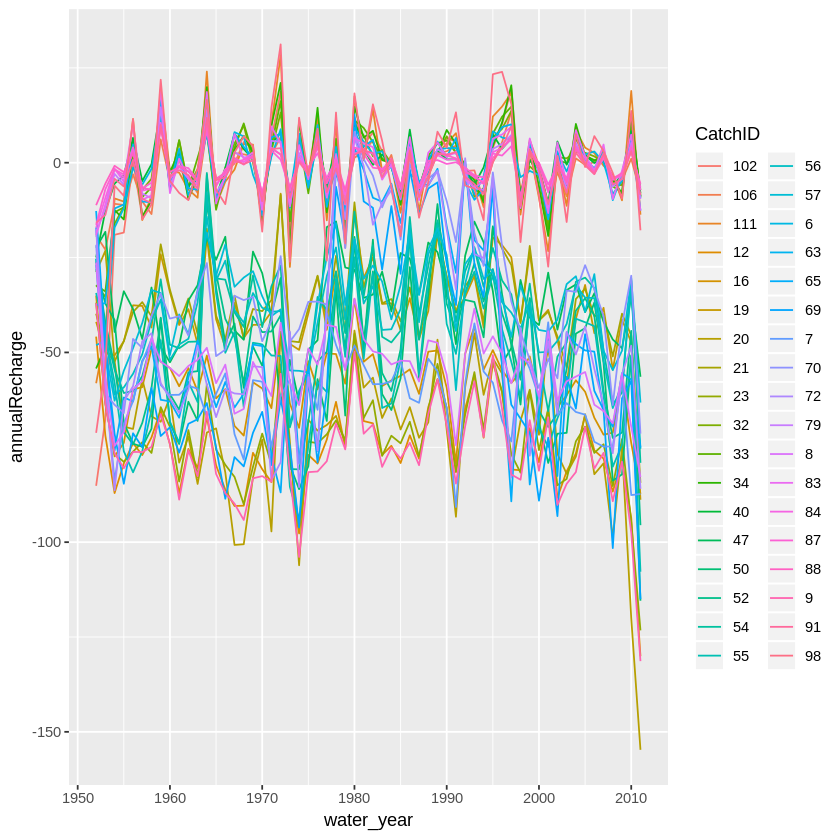

In [41]:
totalRecharge_summary %>% ggplot(aes(x = water_year, y = annualRecharge, color=CatchID)) +
        geom_line()


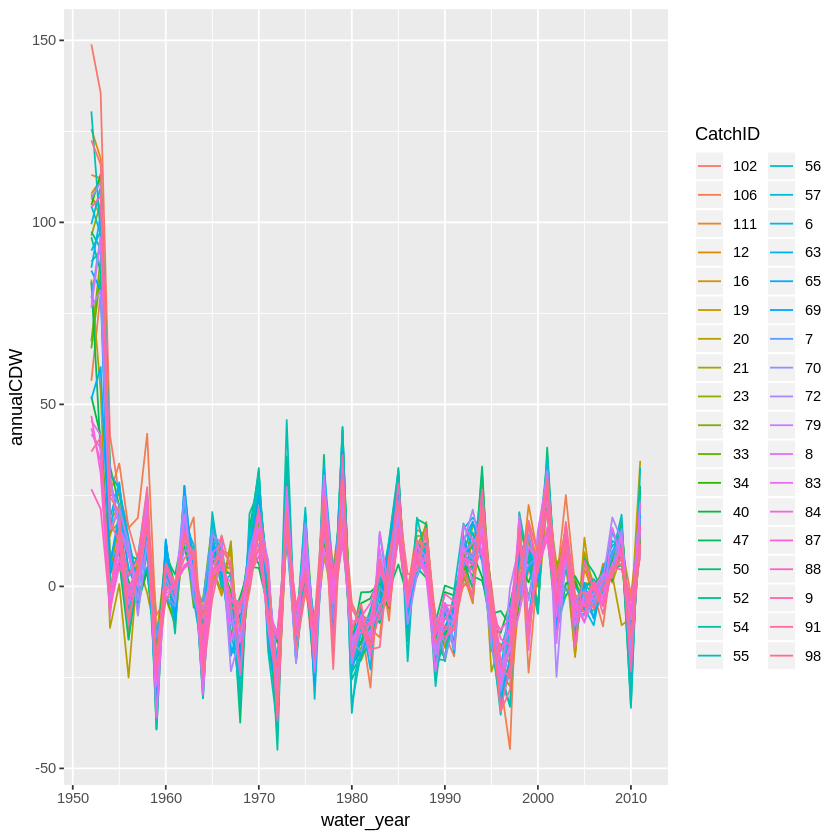

In [46]:
totalRecharge_summary %>% ggplot(aes(x = water_year, y = annualCDW, color=CatchID)) +
        geom_line()


In [54]:
# print average recharge at monthly timestep 
totalRecharge_annual <- totalRecharge_summary %>%
    filter(.,water_year>1952 && water_year<2011)%>%
    group_by(CatchID) %>%
    summarise(averageAnnualRecharge = mean(annualRecharge),
              averageAnnualP = mean(annualP),
              averageAnnualE = mean(annualE),
              averageAnnualSR = mean(annualSR),             
              averageAnnualCDW = mean(annualCDW),
              averageAnnualCSS = mean(annualCSS)              
             )             
          
# print summary
fwrite(totalRecharge_annual, paste0(getwd(),'/AverageRechargeAnnual_summary.txt'), sep = '\t', row.names = F, col.names = T, append = F)

In [55]:
totalRecharge_annual

CatchID,averageAnnualRecharge,averageAnnualP,averageAnnualE,averageAnnualSR,averageAnnualCDW,averageAnnualCSS
102,-1.9862027,82.78338,59.98869,24.82725,4.1981187,0.04635271
106,-2.2460823,53.27657,41.52941,14.00621,3.8762552,0.01296827
111,-1.1643514,101.97074,66.96083,36.24639,2.7819458,0.07212817
12,-74.8916800,102.11447,61.17416,115.90665,2.6846572,0.07465631
16,-58.3330661,95.14080,64.61132,88.92342,3.0517094,0.06087382
19,-37.6704371,117.53291,65.15177,90.13028,2.0234541,0.07870215
20,-70.4516209,142.27304,38.44824,174.33610,0.2079862,0.05968883
21,-36.3391476,114.82927,65.21936,86.02635,2.0624153,0.07728689
23,-72.5469276,107.52224,68.50507,111.64206,2.4819347,0.07795955
32,-0.8905971,82.09724,56.87282,26.14044,2.7368473,0.02541996


In [ ]:
head(DateTime_water_year.txt)

unzip(paste0(getwd(),'totalRecharge_depot.txt.gz'))

### Calculate Monthly Summaries

In [ ]:
colnames(DateTime_water_year.txt)

In [56]:
#Precipitation_in.txt
subsetcols <-append(c('TimeStep','yyyymmdd','year','month','day','water_year'),basin_subset$Drainages)

In [57]:
#basin_subset$Drainages
#append(colnames(DateTime_water_year.txt),basin_subset$Drainages)
Precipitation_in.txt %>% select(subsetcols)
Evaporation_in.txt %>% select(subsetcols)
Artificial_Drainage_cfs.txt %>% select(subsetcols)

TimeStep,yyyymmdd,year,month,day,water_year,Drainage6,Drainage7,Drainage8,Drainage9,⋯,Drainage79,Drainage83,Drainage84,Drainage87,Drainage88,Drainage91,Drainage98,Drainage102,Drainage106,Drainage111
1,19520620,1952,6,20,1952,0.421557874,0.459848819,0.450750787,0.501516535,⋯,6.053870e-01,8.120685e-01,0.4456346457,4.016803e-01,0.4040740157,0.4466000000,0.3488662598,4.479295e-01,0.3951496063,5.519091e-01
2,19520621,1952,6,21,1952,0.010816673,0.011516976,0.010989528,0.012301016,⋯,2.125292e-02,2.544276e-02,0.0130377795,1.155852e-02,0.0116620984,0.0129212874,0.0086460827,1.132365e-02,0.0110500157,1.302549e-02
3,19520622,1952,6,22,1952,0.000320152,0.000000000,0.000000000,0.000000000,⋯,1.254656e-02,7.675720e-03,0.0034352228,3.311696e-03,0.0013743252,0.0021598913,0.0283199134,6.808929e-04,0.0028868020,8.004724e-06
4,19520623,1952,6,23,1952,0.000000000,0.000000000,0.000000000,0.000000000,⋯,0.000000e+00,0.000000e+00,0.0000000000,0.000000e+00,0.0000000000,0.0000000000,0.0000000000,0.000000e+00,0.0000000000,0.000000e+00
5,19520624,1952,6,24,1952,0.030169087,0.046564882,0.059854921,0.067315000,⋯,0.000000e+00,3.179528e-05,0.0000000000,2.848819e-06,0.0000000000,0.0000000000,0.0504507874,4.364386e-02,0.0000000000,8.317197e-02
6,19520625,1952,6,25,1952,0.006544756,0.010749004,0.015078752,0.016426764,⋯,2.897031e-03,1.471624e-03,0.0007294098,7.732630e-04,0.0002163996,0.0003408555,0.0569410236,1.178520e-02,0.0005682457,2.294562e-02
7,19520626,1952,6,26,1952,0.045703780,0.060662953,0.069410945,0.074485512,⋯,2.680489e-02,2.252387e-02,0.0230285315,3.412731e-02,0.0106743346,0.0124969134,0.0470583465,6.341571e-02,0.0357213031,9.797677e-02
8,19520627,1952,6,27,1952,0.521615748,0.631057480,0.680281890,0.751171654,⋯,5.442402e-01,6.909429e-01,0.4076641732,4.033134e-01,0.3414667717,0.3795314567,0.7351921260,6.280925e-01,0.4025669291,8.934803e-01
9,19520628,1952,6,28,1952,0.655938189,0.788990551,0.853232283,0.947756299,⋯,7.431492e-01,9.633811e-01,0.5346291339,4.906047e-01,0.4726704724,0.5246724409,0.8648921260,7.714571e-01,0.4819574803,1.115058e+00
10,19520629,1952,6,29,1952,0.215251654,0.291388937,0.353097402,0.387501929,⋯,2.052936e-01,2.375787e-01,0.1276393701,1.126577e-01,0.1079497244,0.1223457874,0.4956602362,2.912544e-01,0.1062283858,5.029618e-01


TimeStep,yyyymmdd,year,month,day,water_year,Drainage6,Drainage7,Drainage8,Drainage9,⋯,Drainage79,Drainage83,Drainage84,Drainage87,Drainage88,Drainage91,Drainage98,Drainage102,Drainage106,Drainage111
1,19520620,1952,6,20,1952,0.23205047,0.26956933,0.27633083,0.26077610,⋯,0.2568611,0.35811287,0.16114272,0.16330606,0.13655307,0.14694079,0.24669138,0.26390394,0.2082133,0.31123622
2,19520621,1952,6,21,1952,0.17165992,0.17900134,0.17355374,0.16070976,⋯,0.1992409,0.25405972,0.13394654,0.14398236,0.12537839,0.12895228,0.12308272,0.17285531,0.1903169,0.17384520
3,19520622,1952,6,22,1952,0.12109350,0.12433598,0.11888909,0.11329602,⋯,0.1587997,0.18995421,0.12096823,0.12210866,0.11127614,0.12529996,0.11532827,0.12349543,0.1569343,0.12427772
4,19520623,1952,6,23,1952,0.17805287,0.18608051,0.18778201,0.18017283,⋯,0.2289445,0.26114138,0.18288996,0.16986563,0.17942319,0.19198012,0.16774102,0.19215169,0.2101952,0.19933232
5,19520624,1952,6,24,1952,0.18285417,0.19772937,0.20521433,0.22756831,⋯,0.2518084,0.23665508,0.19485579,0.18692969,0.19727264,0.21078630,0.19986906,0.23436701,0.2315426,0.23305898
6,19520625,1952,6,25,1952,0.10202976,0.11295815,0.11993185,0.13055146,⋯,0.1534140,0.12095244,0.12133028,0.12079138,0.10836953,0.12518098,0.15536531,0.12436232,0.1548652,0.13808024
7,19520626,1952,6,26,1952,0.13599654,0.15561787,0.16607732,0.17373976,⋯,0.1679406,0.13840917,0.13426606,0.14266835,0.11281858,0.13286008,0.17522484,0.15954496,0.1806488,0.19811476
8,19520627,1952,6,27,1952,0.18061157,0.22889890,0.25357827,0.23432508,⋯,0.1726983,0.21936417,0.10019906,0.09399307,0.07389004,0.08642677,0.25731354,0.21965551,0.1187909,0.29341815
9,19520628,1952,6,28,1952,0.17933102,0.18488476,0.17570787,0.15751197,⋯,0.2323594,0.33819299,0.13912335,0.13561717,0.12002496,0.12826217,0.09657028,0.16902803,0.1925183,0.16170031
10,19520629,1952,6,29,1952,0.29852728,0.32628031,0.32346976,0.28079398,⋯,0.3218126,0.41898780,0.21086441,0.21232921,0.19931724,0.20322563,0.21091244,0.30848335,0.2673860,0.31606917


TimeStep,yyyymmdd,year,month,day,water_year,Drainage6,Drainage7,Drainage8,Drainage9,⋯,Drainage79,Drainage83,Drainage84,Drainage87,Drainage88,Drainage91,Drainage98,Drainage102,Drainage106,Drainage111
1,19520620,1952,6,20,1952,0,0,0,0,⋯,1.697970,0,3.868976,8.595104,5.600145,2.452956,0,0,0,0
2,19520621,1952,6,21,1952,0,0,0,0,⋯,3.791570,0,3.834060,9.263477,6.104955,2.452167,0,0,0,0
3,19520622,1952,6,22,1952,0,0,0,0,⋯,1.697970,0,3.752279,9.243623,5.571349,2.449870,0,0,0,0
4,19520623,1952,6,23,1952,0,0,0,0,⋯,1.697970,0,3.674233,9.222091,5.535929,2.433356,0,0,0,0
5,19520624,1952,6,24,1952,0,0,0,0,⋯,1.697970,0,3.674233,9.197548,5.460257,2.416605,0,0,0,0
6,19520625,1952,6,25,1952,0,0,0,0,⋯,1.697970,0,3.630722,9.046048,5.216476,2.427906,0,0,0,0
7,19520626,1952,6,26,1952,0,0,0,0,⋯,1.697970,0,3.792400,8.793332,5.122185,2.436094,0,0,0,0
8,19520627,1952,6,27,1952,0,0,0,0,⋯,1.697970,0,3.906879,7.462717,5.107819,2.443193,0,0,0,0
9,19520628,1952,6,28,1952,0,0,0,0,⋯,2.041675,0,6.327017,10.174667,7.929298,3.879373,0,0,0,0
10,19520629,1952,6,29,1952,0,0,0,0,⋯,2.039855,0,5.546357,11.123968,6.504805,3.393643,0,0,0,0


In [58]:
# monthly average
monthlySummary_Precipitation_in.txt <- Precipitation_in.txt %>% select(subsetcols) %>%
    # group by TimeStep and Month
    select(-c(TimeStep, yyyymmdd, year, day)) %>%
    melt(., id.vars = c('month', 'water_year'), variable.name = 'Drainages', value.name = 'Precipitation') %>%

    # calculate total by month, year, and drainage
    group_by(month, water_year, Drainages) %>%
    summarise(sumByMonthyByWateryearByDrainage = sum(Precipitation)) %>%

    # calculate mean by month, year, and drainage
    group_by(month, Drainages) %>%
    summarise(meanByMonthByDrainage = mean(sumByMonthyByWateryearByDrainage)) %>%

    # calculate mean and sd by month
    group_by(month) %>%
    mutate(meanByMonth = mean(meanByMonthByDrainage),
           sdByMonth = sd(meanByMonthByDrainage)) %>%

    # reformat the table to wide for each DrainageID
    dcast(., month + meanByMonth + sdByMonth ~ Drainages, value.var = 'meanByMonthByDrainage') %>%
    data.table()


# monthly average for the 9 water years
monthlySummary_Evaporation_in.txt <- Evaporation_in.txt %>% select(subsetcols) %>%
    # group by TimeStep and Month
    select(-c(TimeStep, yyyymmdd, year, day)) %>%
    melt(., id.vars = c('month', 'water_year'), variable.name = 'Drainages', value.name = 'Evaporation') %>%

    # calculate total by month, year, and drainage
    group_by(month, water_year, Drainages) %>%
    summarise(sumByMonthyByWateryearByDrainage = sum(Evaporation)) %>%

    # calculate mean by month, year, and drainage
    group_by(month, Drainages) %>%
    summarise(meanByMonthByDrainage = mean(sumByMonthyByWateryearByDrainage)) %>%

    # calculate mean and sd by month
    group_by(month) %>%
    mutate(meanByMonth = mean(meanByMonthByDrainage),
           sdByMonth = sd(meanByMonthByDrainage)) %>%

    # reformat the table to wide for each DrainageID
    dcast(., month + meanByMonth + sdByMonth ~ Drainages, value.var = 'meanByMonthByDrainage') %>%
    data.table()

# the average and sd of the average Drainages
monthlySummary_Artificial_Drainage_cfs.txt <- Artificial_Drainage_cfs.txt %>% select(subsetcols) %>%
    # group by TimeStep and Month
    select(-c(TimeStep, yyyymmdd, year, day)) %>%
    melt(., id.vars = c('month','water_year'), variable.name = 'Drainages', value.name = 'Artificial_Drainages') %>%

    # calculate the sum of artificial drainage for each month and wateryear
    group_by(month, water_year) %>%
    mutate(sumByMonthByWateryear = sum(Artificial_Drainages)) %>%

    # calculate mean by month and drainage
    group_by(month, Drainages) %>%
    mutate(meanByMonthByDrainage = mean(Artificial_Drainages)) %>%

    # calculate mean and sd by month
    group_by(month) %>%
    mutate(meanByMonth = mean(meanByMonthByDrainage),
           sdByMonth = sd(meanByMonthByDrainage),
           meanOfSumByMonth = mean(sumByMonthByWateryear)) %>%

    # reformat the table to wide for each DrainageID
    select(month, meanOfSumByMonth, meanByMonth, sdByMonth, Drainages, meanByMonthByDrainage) %>%
    unique() %>% # meanByMonthByDrainage should be the most stringent - get rid of duplicate rows
    dcast(., month ~ Drainages, value.var = 'meanByMonthByDrainage') %>%
    data.table()


# the average and sd of the average Node
monthlySummary_FlowAtStreamNodes_cfs.txt <- FlowAtStreamNodes_cfs.txt %>%
    # group by TimeStep and Month
    select(-c(TimeStep, yyyymmdd, year, day, water_year)) %>%
    melt(., id.vars = c('month'), variable.name = 'Node', value.name = 'FlowAtStreamNodes') %>%

    # calculate mean by month and node
    group_by(month, Node) %>%
    summarise(meanByMonthByNode = mean(FlowAtStreamNodes)) %>%

    # calculate mean and sd by month
    group_by(month) %>%
    mutate(meanByMonth = mean(meanByMonthByNode),
           sdByMonth = sd(meanByMonthByNode)) %>%

    # reformat the table to wide for each NodeID
    dcast(., month+meanByMonth+sdByMonth~Node, value.var = 'meanByMonthByNode') %>%
    select(month, meanByMonth, sdByMonth, Node1, Node4, Node28) %>%
    data.table()

In [66]:
if(grepl('WMon',getwd())){

    # the average and sd of the average User
    monthlySummary_UserDemand_gpd.txt <- UserDemand_gpd.txt %>%
        # group by TimeStep and Month
        select(-c(TimeStep, yyyymmdd, year, day, water_year)) %>%
        melt(., id.vars = c('month'), variable.name = 'User', value.name = 'UserDemand_gpd') %>%
        mutate(UserType = UserType_table[match(User, user),UserType]) %>%

        # calculate mean by month, and UserType
        group_by(month, UserType) %>%
        mutate(meanByMonthByUserType = mean(UserDemand_gpd)) %>%

        # calculate mean and sd by month
        group_by(month) %>%
        mutate(meanByMonth = mean(UserDemand_gpd),
               sdByMonth = sd(UserDemand_gpd)) %>%

        # reformat the table to wide for each UserType
        select(-c(User, UserDemand_gpd)) %>%
        dcast(., month + meanByMonth + sdByMonth ~ UserType, fun = mean, value.var = c('meanByMonthByUserType')) %>%
        data.table()


    # the average monthly sum for each UserType
    monthlySums_UserDemand_gpd.txt <- UserDemand_gpd.txt %>%
        # group by month and water_year
        select(-c(TimeStep, yyyymmdd, year, day)) %>%
        melt(., id.vars = c('month','water_year'), variable.name = 'User', value.name = 'UserDemand_gpd') %>%
        mutate(UserType = UserType_table[match(User, user),UserType]) %>%

        # calculate sum by month, water_year, and UserType
        group_by(month, water_year, UserType) %>%
        mutate(UserDemand_gpm = sum(UserDemand_gpd)) %>%

        # calculate mean of the sums by month, and UserType
        group_by(month, UserType) %>%
        mutate(mean_UserDemand_gpm = mean(UserDemand_gpm)) %>%

        # calculate 
        group_by(month) %>%
        mutate(sumByMonth = sum(UserDemand_gpd),
               meanByMonth = mean(UserDemand_gpd),
               sdByMonth = sd(UserDemand_gpd),
               varByMonth = var(UserDemand_gpd)) %>%

        # reformat the table to wide for each UserType
        select(-c(User, water_year, UserDemand_gpd)) %>%
        dcast(., month + sumByMonth + meanByMonth + sdByMonth + varByMonth ~ UserType, fun = mean, value.var = c('mean_UserDemand_gpm')) %>%
        data.table()


    # the average and sd of the average User
    monthlySummary_UserWithdrawal_gpd.txt <- UserWithdrawal_gpd.txt %>%
        # group by TimeStep and Month
        select(-c(TimeStep, yyyymmdd, year, day, water_year)) %>%
        melt(., id.vars = c('month'), variable.name = 'User', value.name = 'UserWithdrawal_gpd') %>%
        mutate(UserType = UserType_table[match(User, user),UserType]) %>%

        # calculate mean by month, and UserType
        group_by(month, UserType) %>%
        mutate(meanByMonthByUserType = mean(UserWithdrawal_gpd)) %>%

        # calculate mean and sd by month
        group_by(month) %>%
        mutate(meanByMonth = mean(UserWithdrawal_gpd),
               sdByMonth = sd(UserWithdrawal_gpd)) %>%

        # reformat the table to wide for each UserType
        select(-c(User, UserWithdrawal_gpd)) %>%
        dcast(., month + meanByMonth + sdByMonth ~ UserType, fun = mean, value.var = c('meanByMonthByUserType')) %>%
        data.table()


    # the average monthly sum for each UserType
    monthlySums_UserWithdrawal_gpd.txt <- UserWithdrawal_gpd.txt %>%
        # group by TimeStep and Month
        select(-c(TimeStep, yyyymmdd, year, day)) %>%
        melt(., id.vars = c('month','water_year'), variable.name = 'User', value.name = 'UserWithdrawal_gpd') %>%
        mutate(UserType = UserType_table[match(User, user),UserType]) %>%

        # calculate mean by month, water_year, and UserType
        group_by(month, water_year, UserType) %>%
        mutate(UserWithdrawal_gpm = sum(UserWithdrawal_gpd)) %>%

        # calculate mean of the sums by month, and UserType
        group_by(month, UserType) %>%
        mutate(mean_UserWithdrawal_gpm = mean(UserWithdrawal_gpm)) %>%

        # calculate 
        group_by(month) %>%
        mutate(sumByMonth = sum(UserWithdrawal_gpd),
               meanByMonth = mean(UserWithdrawal_gpd),
               sdByMonth = sd(UserWithdrawal_gpd),
               varByMonth = var(UserWithdrawal_gpd)) %>%

        # reformat the table to wide for each UserType
        select(-c(User, water_year, UserWithdrawal_gpd)) %>%
        dcast(., month + sumByMonth + meanByMonth + sdByMonth + varByMonth ~ UserType, fun = mean, value.var = c('mean_UserWithdrawal_gpm')) %>%
        data.table()


    # monthly average for the 9 water years
    # monthlySummary_rain_in.dat <- rain_in_obs.dat %>%
    #     # group by TimeStep and Month
    #     melt(., id.vars = c('TimeStep', 'water_year', 'month'), variable.name = 'zone_code', value.name = 'rain_in_obs') %>%
    #     mutate(zone_code = paste0('zone_',zone_code)) %>%

    #     # calculate total by month, water_year, and zone_code
    #     group_by(month, water_year, zone_code) %>%
    #     mutate(sumByMonthByWateryearByZonecode = sum(rain_in_obs)) %>%

    #     # calculate mean by month, and drainage
    #     group_by(month, zone_code) %>%
    #     mutate(mean_rain_in_obs = mean(sumByMonthByWateryearByZonecode)) %>%

    #     # calculate mean and sd by month
    #     group_by(month) %>%
    #     mutate(meanSumByMonth = mean(sumByMonthByWateryearByZonecode),
    #            meanByMonth = mean(rain_in_obs),
    #            sdByMonth = sd(rain_in_obs)) %>%

    #     # reformat the table to wide for each DrainageID
    #     select(-c(TimeStep, water_year, rain_in_obs, sumByMonthByWateryearByZonecode)) %>%
    #     dcast(., month+meanSumByMonth+meanByMonth+sdByMonth~zone_code, fun=mean, value.var = c('mean_rain_in_obs')) %>%
    #     data.table()
}

### Calculate Annual Summaries

In [83]:
# annual average for the 9 water years
yearlySummary_Precipitation_in.txt <- Precipitation_in.txt %>%
    # group by TimeStep and Month
    select(-c(TimeStep, yyyymmdd, year, day)) %>%
    melt(., id.vars = c('month', 'water_year'), variable.name = 'Drainages', value.name = 'Precipitation') %>%

    # calculate total by month, wateryear, and drainage
    group_by(month, water_year, Drainages) %>%
    summarise(sumByMonthByWateryearByDrainage = sum(Precipitation)) %>%

    # calculate mean by wateryear, and drainage
    group_by(water_year, Drainages) %>%
    summarise(meanByWateryearByDrainage = sum(sumByMonthByWateryearByDrainage)) %>%

    # calculate mean and sd by month
    group_by(water_year) %>%
    mutate(meanByWateryear = mean(meanByWateryearByDrainage),
           sdByWateryear = sd(meanByWateryearByDrainage)) %>%

    # reformat the table to wide for each DrainageID
    dcast(., water_year + meanByWateryear + sdByWateryear ~ Drainages, value.var = 'meanByWateryearByDrainage') %>%
    data.table()


# annual average for the 9 water years
yearlySummary_Evaporation_in.txt <- Evaporation_in.txt %>%
    # group by TimeStep and Month
    select(-c(TimeStep, yyyymmdd, year, day)) %>%
    melt(., id.vars = c('month', 'water_year'), variable.name = 'Drainages', value.name = 'Evaporation') %>%

    # calculate total by month, wateryear, and drainage
    group_by(month, water_year, Drainages) %>%
    summarise(sumByMonthByWateryearByDrainage = sum(Evaporation)) %>%

    # calculate mean by wateryear, and drainage
    group_by(water_year, Drainages) %>%
    summarise(meanByWateryearByDrainage = sum(sumByMonthByWateryearByDrainage)) %>%

    # calculate mean and sd by month
    group_by(water_year) %>%
    mutate(meanByWateryear = mean(meanByWateryearByDrainage),
           sdByWateryear = sd(meanByWateryearByDrainage)) %>%

    # reformat the table to wide for each DrainageID
    dcast(., water_year + meanByWateryear + sdByWateryear ~ Drainages, value.var = 'meanByWateryearByDrainage') %>%
    data.table()


if(grepl('WMon',getwd())){
    # the average annual sum for each UserType
    yearlySums_UserDemand_gpd.txt <- UserDemand_gpd.txt %>%
        # group by month and water_year
        select(-c(TimeStep, yyyymmdd, year, month, day)) %>%
        melt(., id.vars = c('water_year'), variable.name = 'User', value.name = 'UserDemand_gpd') %>%
        mutate(UserType = UserType_table[match(User, user),UserType]) %>%

        # calculate sum by water_year, and UserType
        group_by(water_year, UserType) %>%
        mutate(UserDemand_gpy = sum(UserDemand_gpd)) %>%

        # calculate sum by water_year
        group_by(water_year) %>%
        mutate(sumByWateryear = sum(UserDemand_gpd)) %>%

        # reformat the table to wide for each UserType
        select(-c(UserDemand_gpd, User)) %>%
        dcast(., water_year + sumByWateryear ~ UserType, fun = mean, value.var = c('UserDemand_gpy')) %>%
        data.table()



    # the average annual sum for each UserType
    yearlySums_UserWithdrawal_gpd.txt <- UserWithdrawal_gpd.txt %>%
        # group by month and water_year
        select(-c(TimeStep, yyyymmdd, year, month, day)) %>%
        melt(., id.vars = c('water_year'), variable.name = 'User', value.name = 'UserWithdrawal_gpd') %>%
        mutate(UserType = UserType_table[match(User, user),UserType]) %>%

        # calculate sum by water_year, and UserType
        group_by(water_year, UserType) %>%
        mutate(UserWithdrawal_gpy = sum(UserWithdrawal_gpd)) %>%

        # calculate sum by water_year
        group_by(water_year) %>%
        mutate(sumByWateryear = sum(UserWithdrawal_gpd)) %>%

        # reformat the table to wide for each UserType
        select(-c(UserWithdrawal_gpd, User)) %>%
        dcast(., water_year + sumByWateryear ~ UserType, fun = mean, value.var = c('UserWithdrawal_gpy')) %>%
        data.table()
}




# # annual average for the 9 water years
# yearlySummary_rain_in_obs.dat <- rain_in_obs.dat %>%
#     # group by TimeStep and Month
#     select(-c(TimeStep)) %>%
#     melt(., id.vars = c('month', 'water_year'), variable.name = 'zone_code', value.name = 'rain_in_obs') %>%
#     mutate(zone_code = paste0('zone_',zone_code)) %>%

#     # calculate total by month, wateryear, and drainage
#     group_by(month, water_year, zone_code) %>%
#     mutate(sumByMonthByWateryearByZonecode = sum(rain_in_obs)) %>%

#     # calculate mean by wateryear, and drainage
#     group_by(water_year, zone_code) %>%
#     mutate(meanByWateryearByZonecode = mean(sumByMonthByWateryearByZonecode)) %>%

#     # calculate mean and sd by month
#     group_by(water_year) %>%
#     mutate(sumByWateryear = sum(rain_in_obs),
#            meanByWateryear = mean(sumByMonthByWateryearByZonecode),
#            sdByWateryear = sd(sumByMonthByWateryearByZonecode)) %>%

#     # reformat the table to wide for each DrainageID
#     select(-c(month, rain_in_obs, sumByMonthByWateryearByZonecode)) %>%
#     dcast(., water_year + sumByWateryear + meanByWateryear + sdByWateryear ~ zone_code, fun = mean, value.var = c('meanByWateryearByZonecode')) %>%
#     data.table()

In [84]:
yearlySums_UserDemand_gpd.txt

water_year,sumByWateryear,IrrigationType4,Type1,Type11,Type3,Type5,Type6,NA
1952,93060586205,4305102032,45092697625,617936951,266492002,2669329154,151558466,39957469975
1953,90461920769,12550158336,60496776189,1875094231,944364862,7921707906,537076119,6136743126
1954,75458954934,12550158336,45493810354,1875094231,944364862,7921707906,537076119,6136743126
1955,79206877890,12550158336,49241733310,1875094231,944364862,7921707906,537076119,6136743126
1956,87396649879,12580753057,57360942810,1876680259,946952163,7941222477,538547560,6151551552
1957,90515743516,12550158336,60550598937,1875094231,944364862,7921707906,537076119,6136743126
1958,103952060344,12550158336,73986915764,1875094231,944364862,7921707906,537076119,6136743126
1959,78752851769,12550158336,48787707190,1875094231,944364862,7921707906,537076119,6136743126
1960,75053773432,12580753057,45018066363,1876680259,946952163,7941222477,538547560,6151551552
1961,87530932247,12550158336,57565787668,1875094231,944364862,7921707906,537076119,6136743126


### Calculate Artificial Drainage Flows and User Demand

In [85]:
# Calculate the Ratios
AD_FASN_Summary <- Artificial_Drainage_cfs.txt %>%
    # group by TimeStep and Month
    select(-c(yyyymmdd, year, month, day, water_year)) %>%
    melt(., id.vars = c('TimeStep'), variable.name = 'Drainages', value.name = 'Artificial_Drainages') %>%

    # calculate the sum of artificial drainage for each month and wateryear
    group_by(TimeStep) %>%
    summarise(sumArtDrainByTimeStep = sum(Artificial_Drainages)) %>%

    # merge with FlowAtStreamNodes
    merge(., FlowAtStreamNodes_cfs.txt %>% 
            select(TimeStep, water_year, month, Node1) %>% 
            group_by(water_year, month) %>% 
            mutate(monthlyMeanNode1 = mean(Node1)),
          all=F, fill=T) %>%
    mutate(ratio_ArtDrain_Node1 = sumArtDrainByTimeStep/Node1,
           ratio_ArtDrain_monthlyMeanNode1 = sumArtDrainByTimeStep/monthlyMeanNode1) %>%
    data.table()

# UserTypes (Currently numbered like this as of 8/31/2018)
UserType_table <- rbindlist(list(
    data.table(user = paste0('User', 1:164), UserType = 'IrrigationType4'),
    data.table(user = paste0('User', 165:407), UserType = 'Type5'),
    data.table(user = paste0('User', 408:495), UserType = 'Type1'),
    data.table(user = paste0('User', 496:526), UserType = 'Type6'),
    data.table(user = paste0('User', 527), UserType = 'Type11'),
    data.table(user = paste0('User', 528), UserType = 'Type3')))

### Calculate Flow Model Ouputs and Streamflow Observations

In [86]:

# find meta lines for streamflow_calibration.dat
streamflow_calibration.dat_meta <- findmeta('streamflow_calibration.dat')
col.Names <- streamflow_calibration.dat_meta %>% gsub("\\t+$","",.) %>% strsplit(' |\t') %>% tail(1) %>% unlist() %>% .[-c(1,2)] %>% .[.!=""]


# read in streamflow_calibration.dat using readlines approach. read_dat was not working due to extra space characters.
# streamflow_calibration.dat <- read_dat('streamflow_calibration.dat', streamflow_calibration.dat_meta)
dat <- readLines('streamflow_calibration.dat', skip = length(streamflow_calibration.dat_meta)) %>%
    .[-c(1:4)] %>% 
    gsub('^[[:space:]]+|[[:space:]]+$','', .) %>% 
    gsub('[[:space:]]+','\t', .) %>% 
    strsplit(., '\t') %>% 
    do.call(rbind, .) %>% 
    data.table()

nonNA <- colnames(dat)[which(colSums(is.na(dat)) != nrow(dat))]
dat <- dat %>% select(nonNA)
setnames(dat, colnames(dat), paste0('SF',col.Names))
streamflow_calibration.dat <- dat %>% 
    mutate_at(colnames(.)[!colnames(.) %in% c('Date','Hour','TimeStep')], funs(as.numeric(.))) %>% data.table()


# convert cms to cfs: 1cms = 35.3147 cfs
FlowAtStreamNodes_calib_cfs.txt <- FlowAtStreamNodes_cms.txt %>%
    mutate_at(colnames(.)[!colnames(.) %in% c('Date','Hour','TimeStep')], funs(.*35.3147)) %>%
    merge(., DateTime_calib.txt, by = 'TimeStep') %>% 
    mutate(FlowAtOutlet = Node1) %>% # 
    arrange(TimeStep) %>% 
    select(TimeStep, yyyymmdd, year, month, day, water_year, contains('Node')) %>%
    data.table()


# convert cms to cfs: 1cms = 35.3147 cfs
FlowAtStreamNodes_valid_cfs.txt <- FlowAtStreamNodes_cms.txt %>%
    mutate_at(colnames(.)[!colnames(.) %in% c('Date','Hour','TimeStep')], funs(.*35.3147)) %>%
    merge(., DateTime_valid.txt, by = 'TimeStep', all.y = T) %>% 
    mutate(FlowAtOutlet = Node1) %>% # 
    arrange(TimeStep) %>% 
    select(TimeStep, yyyymmdd, year, month, day, water_year, contains('Node')) %>%
    data.table()


# multiple flowatstreamnodes
# FlowAtStreamNodes_calib_cfs.txt
# FlowAtStreamNodes_valid_cfs.txt
# FlowAtStreamNodes_cfs.txt

# compare node4 (streamflow_calibration1) and node28 (streamflow_calibration2)
# the comparison between FlowAtStreamNodes (model output) and streamflow_calibration (obs)

# rename the metadata file
streamflow_calibration_calib_cfs.dat_meta <- streamflow_calibration.dat_meta

# adjust streamflow_calibration to cfs and filter for the calibration date range
streamflow_calibration_calib_cfs.dat <- streamflow_calibration.dat %>% 
    # convert cms to cfs
    mutate_at(colnames(.)[!colnames(.) %in% c('Date','Hour','TimeStep')], funs(.*35.3147)) %>%
    #mutate(SF152 = ifelse(SF152 == -999*35.3147, NA, SF152), 
    #       SF236 = ifelse(SF236 == -999*35.3147, NA, SF236)) %>%

    # add date sequence and convert to the %Y%m%d format
    mutate(date = seq(from = as.Date('20030613', format = '%Y%m%d'), by = 'day', length.out = nrow(streamflow_calibration.dat)), 
           date = format(date, '%Y%m%d')) %>%

    # filter for the respective model run dates
    filter(date %in% FlowAtStreamNodes_calib_cfs.txt[,yyyymmdd])


# # PATCH NEEDED: location observation files to use for imputation
# # obs data update for column 1
# BertrandStreamflow <- read.table(paste(ObsStreamflowData,'BertrandStreamflow.txt', sep='/'), sep = '\t', header = T) %>% 
#     mutate(Date = format(as.Date(Date, format = '%M/%d/%Y'), '%Y%m%d')) %>%
#     setnames(., colnames(.), c('Date', 'Flow_cfs')) %>%
#     data.table()
# CanadaStreamflow <- read.table(paste(ObsStreamflowData,'Daily__Sep-15-2016_10_14_39PM__ddf.txt', sep='/'), sep = '\t', header = T) %>% 
#     mutate(Date = format(as.Date(Date, format = '%M/%d/%Y'), '%Y%m%d')) %>%
#     data.table()


# # PATCH NEEDED: impute missing values using reference nodes
# # add the missing values
# streamflow_calibration_valid_cfs.dat <- streamflow_calibration_valid_cfs.dat %>%
#     mutate(SF152 = ifelse(is.na(SF152), BertrandStreamflow[match(date, Date), Flow_cfs], SF152),
#            SF236 = ifelse(is.na(SF236), CanadaStreamflow[match(date, Date), Value]*35.3147, SF236)) %>%
#     mutate(date = as.integer(date)) %>%
#     data.table()
# FlowAtStreamNodes_valid_cfs.txt <- FlowAtStreamNodes_valid_cfs.txt[yyyymmdd %in% streamflow_calibration_valid_cfs.dat[,date],]


# # PATCH NEEDED: compute nash-suttcliffe coefficient using reference nodes
# # operations linked to a reference node have been removed (e.g., SF152 and SF 236)
# NSEc1 <- NSE(sim = FlowAtStreamNodes_calib_cfs.txt[,Node4], obs = streamflow_calibration_calib_cfs.dat[,SF152], na.rm=T)
# NSEc2 <- NSE(sim = FlowAtStreamNodes_calib_cfs.txt[,Node28], obs = streamflow_calibration_calib_cfs.dat[,SF236], na.rm=T)


[1] "metadata headers for streamflow_calibration.dat"


### Compile Table of Contents and Print Spreadsheet

In [87]:
# compile TableofContents
TableofContents.txt <- rbindlist(list(
    data.table(fileName='TableofContents.txt', desc='table of contents'),
    data.table(fileName='DateTime_water_year.txt', desc='Time steps and datetime reference with water year'),
    data.table(fileName='UserType_table', desc='list of simulated users'),
    
    data.table(fileName='Precipitation_in.txt', desc='Precipitation in inches'),
    data.table(fileName='Evaporation_in.txt', desc='Evapotranspiration in inches'),
    data.table(fileName='FlowAtStreamNodes_cfs.txt', desc='Streamflow at Node in cubic feet per second'),
    data.table(fileName='Artificial_Drainage_cfs.txt', desc='Artificial drainage in cubic feet per second'),
    data.table(fileName='UserDemand_gpd.txt', desc='User type water demand fraction in gallons per day'),
    data.table(fileName='UserWithdrawal_gpd.txt', desc='User type water withdrawal in gallons per day'),
    #data.table(fileName='rain_in_obs.dat', desc='Observed rainfall in inches'),
    
    data.table(fileName='monthlySummary_Artificial_Drainage_cfs.txt', desc='Monthly Artificial drainage', jname='MonAve_ArtDrain_cfs'),
    data.table(fileName='monthlySummary_Evaporation_in.txt', desc='Monthly Evapotranspiration', jname='MonSum__Evap_in'),
    data.table(fileName='monthlySummary_Precipitation_in.txt', desc='Monthly Precipitation',jname='MonAve_Precip_in'),
    data.table(fileName='monthlySummary_FlowAtStreamNodes_cfs.txt', desc='Monthly Streamflow at node',jname='MonAve_FlowAtStreamNodes_cfs'),
    #data.table(fileName='monthlySummary_rain_in.dat', desc='Monthly summary of rainfall in inches',jname='ObsMonAve_Precip_in'),
    data.table(fileName='monthlySummary_UserDemand_gpd.txt', desc='Monthly User Demand',jname='AveDaily_UserDemand_gpd'),
    data.table(fileName='monthlySummary_UserWithdrawal_gpd.txt', desc='Monthly User Withdrawal'),
    data.table(fileName='monthlySums_UserDemand_gpd.txt', desc='Monthly sum of User water demand',jname='MonSum_UserDemand_Gallons'),
    data.table(fileName='monthlySums_UserWithdrawal_gpd.txt', desc='Monthly sum of User water withdrawal'),
    
    data.table(fileName='yearlySummary_Evaporation_in.txt', desc='Yearly Evapotranspiration',jname='AnnSumSubbasin_Evap_in'),
    data.table(fileName='yearlySummary_Precipitation_in.txt', desc='Yearly Precipitation',jname='AnnSumSubbasin_Precip_in'),
    #data.table(fileName='yearlySummary_rain_in_obs.dat', desc='Yearly summary of rainfall in inches'),
    data.table(fileName='yearlySums_UserDemand_gpd.txt', desc='Yearly summary of user water demand in gallons per day'),
    data.table(fileName='yearlySums_UserWithdrawal_gpd.txt', desc='Yearly summary of user water withdrawal in gallons per day'),
    
    data.table(fileName='AD_FASN_Summary', desc='Artificial draining and flow-at-Stream node summary'),
    data.table(fileName='streamflow_calibration_calib_cfs.dat', desc='Streamflow calibration data in cubic feet per second')),
                                 use.names=T, fill=T)

# append Sheet id
TableofContents.txt[,SheetName:=paste0('Sheet', row.names(TableofContents.txt))]


# print to txt files
for (j in as.vector(TableofContents.txt[['fileName']])){
    # "streamflow_calibration_valid_cfs.dat" excluded until additional patch work

    # start
    print(paste('start', j))

    # separate protocol for .dat files
    if(grepl('.dat',j)){
        write.table(j %>% gsub('_in_obs','',.) %>% paste0(., '_meta') %>% get(), file = j, append = F, sep = '\t', row.names = F, col.names = F, quote = F)
        write.table(j, file = j, append = T, sep = '\t', row.names = F, col.names = F)
    } else if (grepl('.txt', j)){
        write.table(j %>% get(), file = j, col.names = T, row.names = F, append = F)
    } else {
        write.table(j %>% get(), file = paste0(j,'.txt'), col.names = T, row.names = F, append = F)
    }

    # finished
    print(paste('finished', j))
}

tabs <- list(TableofContents.txt,
             DateTime_water_year.txt,
             UserType_table,
             
             Precipitation_in.txt,
             Evaporation_in.txt,
             FlowAtStreamNodes_cfs.txt,
             Artificial_Drainage_cfs.txt,
             UserDemand_gpd.txt,
             UserWithdrawal_gpd.txt,
             #rain_in_obs.dat,
             
             monthlySummary_Artificial_Drainage_cfs.txt,
             monthlySummary_Evaporation_in.txt,
             monthlySummary_Precipitation_in.txt,
             monthlySummary_FlowAtStreamNodes_cfs.txt,
             #monthlySummary_rain_in.dat,
             monthlySummary_UserDemand_gpd.txt,
             monthlySummary_UserWithdrawal_gpd.txt,
             monthlySums_UserDemand_gpd.txt,
             monthlySums_UserWithdrawal_gpd.txt,
             
             yearlySummary_Evaporation_in.txt,
             yearlySummary_Precipitation_in.txt,
             #yearlySummary_rain_in_obs.dat,
             yearlySums_UserDemand_gpd.txt,
             yearlySums_UserWithdrawal_gpd.txt,
             
             AD_FASN_Summary,
             streamflow_calibration_calib_cfs.dat)

# print these outputs to xlsx using these names
write_xlsx(tabs, path = paste(ModelSet_folder,'modelruns_summary.xlsx',sep='/'), col_names = TRUE) 

fileName,desc,jname,SheetName
TableofContents.txt,table of contents,NA,Sheet1
DateTime_water_year.txt,Time steps and datetime reference with water year,NA,Sheet2
UserType_table,list of simulated users,NA,Sheet3
Precipitation_in.txt,Precipitation in inches,NA,Sheet4
Evaporation_in.txt,Evapotranspiration in inches,NA,Sheet5
FlowAtStreamNodes_cfs.txt,Streamflow at Node in cubic feet per second,NA,Sheet6
Artificial_Drainage_cfs.txt,Artificial drainage in cubic feet per second,NA,Sheet7
UserDemand_gpd.txt,User type water demand fraction in gallons per day,NA,Sheet8
UserWithdrawal_gpd.txt,User type water withdrawal in gallons per day,NA,Sheet9
monthlySummary_Artificial_Drainage_cfs.txt,Monthly Artificial drainage,MonAve_ArtDrain_cfs,Sheet10


[1] "start TableofContents.txt"
[1] "finished TableofContents.txt"
[1] "start DateTime_water_year.txt"
[1] "finished DateTime_water_year.txt"
[1] "start UserType_table"
[1] "finished UserType_table"
[1] "start Precipitation_in.txt"
[1] "finished Precipitation_in.txt"
[1] "start Evaporation_in.txt"
[1] "finished Evaporation_in.txt"
[1] "start FlowAtStreamNodes_cfs.txt"
[1] "finished FlowAtStreamNodes_cfs.txt"
[1] "start Artificial_Drainage_cfs.txt"
[1] "finished Artificial_Drainage_cfs.txt"
[1] "start UserDemand_gpd.txt"
[1] "finished UserDemand_gpd.txt"
[1] "start UserWithdrawal_gpd.txt"
[1] "finished UserWithdrawal_gpd.txt"
[1] "start monthlySummary_Artificial_Drainage_cfs.txt"
[1] "finished monthlySummary_Artificial_Drainage_cfs.txt"
[1] "start monthlySummary_Evaporation_in.txt"
[1] "finished monthlySummary_Evaporation_in.txt"
[1] "start monthlySummary_Precipitation_in.txt"
[1] "finished monthlySummary_Precipitation_in.txt"
[1] "start monthlySummary_FlowAtStreamNodes_cfs.txt"
[1] "fi

# END of Usable code (below needs to be revisited to debug obs. rain printing)

In [ ]:
### The code chunk above is too long.  Also needs a loop if there is no user data. 

In [ ]:
# find meta lines for rain.dat
rain.dat_meta <- findmeta('rain.dat')

# read in rain.dat
rain.dat <- read_dat('rain.dat', rain.dat_meta)

In [ ]:
# apply conversion from mm to inches. Code-base taken from Precipitation.
# convert mm to inches
rain_in_obs.dat <- rain.dat %>%
    mutate_at(colnames(.)[!colnames(.) %in% c('Date','Hour','TimeStep')], funs(./25.4)) %>%
    merge(., DateTime_water_year.txt, by.x = 'Date', by.y = 'yyyymmdd') %>% 
    arrange(TimeStep) %>%
    select(-c(Date, year, day, Hour, hhmmss))

In [ ]:
# monthly average for the 9 water years
monthlySummary_rain_in.dat <- rain_in_obs.dat %>%
    # group by TimeStep and Month
    melt(., id.vars = c('TimeStep', 'water_year', 'month'), variable.name = 'zone_code', value.name = 'rain_in_obs') %>%
    mutate(zone_code = paste0('zone_',zone_code)) %>%

    # calculate total by month, water_year, and zone_code
    group_by(month, water_year, zone_code) %>%
    mutate(sumByMonthByWateryearByZonecode = sum(rain_in_obs)) %>%

    # calculate mean by month, and drainage
    group_by(month, zone_code) %>%
    mutate(mean_rain_in_obs = mean(sumByMonthByWateryearByZonecode)) %>%

    # calculate mean and sd by month
    group_by(month) %>%
    mutate(meanSumByMonth = mean(sumByMonthByWateryearByZonecode),
           meanByMonth = mean(rain_in_obs),
           sdByMonth = sd(rain_in_obs)) %>%

    # reformat the table to wide for each DrainageID
    select(-c(TimeStep, water_year, rain_in_obs, sumByMonthByWateryearByZonecode)) %>%
    dcast(., month+meanSumByMonth+meanByMonth+sdByMonth~zone_code, fun=mean, value.var = c('mean_rain_in_obs')) %>%
    data.table()

In [ ]:
# annual average for the 9 water years
yearlySummary_rain_in_obs.dat <- rain_in_obs.dat %>%
    # group by TimeStep and Month
    select(-c(TimeStep)) %>%
    melt(., id.vars = c('month', 'water_year'), variable.name = 'zone_code', value.name = 'rain_in_obs') %>%
    mutate(zone_code = paste0('zone_',zone_code)) %>%

    # calculate total by month, wateryear, and drainage
    group_by(month, water_year, zone_code) %>%
    mutate(sumByMonthByWateryearByZonecode = sum(rain_in_obs)) %>%

    # calculate mean by wateryear, and drainage
    group_by(water_year, zone_code) %>%
    mutate(meanByWateryearByZonecode = mean(sumByMonthByWateryearByZonecode)) %>%

    # calculate mean and sd by month
    group_by(water_year) %>%
    mutate(sumByWateryear = sum(rain_in_obs),
           meanByWateryear = mean(sumByMonthByWateryearByZonecode),
           sdByWateryear = sd(sumByMonthByWateryearByZonecode)) %>%

    # reformat the table to wide for each DrainageID
    select(-c(month, rain_in_obs, sumByMonthByWateryearByZonecode)) %>%
    dcast(., water_year + sumByWateryear + meanByWateryear + sdByWateryear ~ zone_code, fun = mean, value.var = c('meanByWateryearByZonecode')) %>%
    data.table()